In [68]:
import pandas as pd

In [69]:
dataset = 'amazon_google'

In [70]:
eval_emt_df = pd.read_csv(dataset + '/emt_robust/eval.csv')
eval_emt_df['model'] = 'robust'

In [71]:
eval_dm_df = pd.read_csv(dataset + '/emt/eval.csv')
eval_dm_df['model'] = 'vanilla'

In [72]:
eval_de_df = pd.read_csv(dataset + '/deeper/eval.csv')
eval_de_df['model'] = 'deepER'

In [73]:
ml_emt = eval_emt_df.loc[(eval_emt_df['label']==1)]
nl_emt = eval_emt_df.loc[(eval_emt_df['label']==0)]
tp_emt = ml_emt.loc[(ml_emt['match']==1)]
fn_emt = ml_emt.loc[(ml_emt['match']==0)]
tn_emt = nl_emt.loc[(nl_emt['match']==0)]
fp_emt = nl_emt.loc[(nl_emt['match']==1)]

In [74]:
ml_de = eval_de_df.loc[(eval_de_df['label']==1)]
nl_de = eval_de_df.loc[(eval_de_df['label']==0)]
tp_de = ml_de.loc[(ml_de['match']==1)]
fn_de = ml_de.loc[(ml_de['match']==0)]
tn_de = nl_de.loc[(nl_de['match']==0)]
fp_de = nl_de.loc[(nl_de['match']==1)]

In [75]:
ml_dm = eval_dm_df.loc[(eval_dm_df['label']==1)]
nl_dm = eval_dm_df.loc[(eval_dm_df['label']==0)]
tp_dm = ml_dm.loc[(ml_dm['match']==1)]
fn_dm = ml_dm.loc[(ml_dm['match']==0)]
tn_dm = nl_dm.loc[(nl_dm['match']==0)]
fp_dm = nl_dm.loc[(nl_dm['match']==1)]

In [76]:
eval_df = pd.concat([eval_emt_df, eval_dm_df], axis=0)
ml = eval_df.loc[(eval_df['label']==1)]
nl = eval_df.loc[(eval_df['label']==0)]
tp = ml.loc[(ml['match']==1)]
fn = ml.loc[(ml['match']==0)]
tn = nl.loc[(nl['match']==0)]
fp = nl.loc[(nl['match']==1)]
eval_df.head()

,Unnamed: 0,match,e_score,drop,perturb,flip,impact,attributes,e_size,prediction,row,t_requested,t_obtained,label,identity,symmetry,t_good,t_bad,model
0,0,0,0.875000,0.933065,drop,1,1,"['title', 'price']",2,0.999788,1111-2755,100,16,0,15,15,15,1,robust
1,1,0,0.875000,0.000009,sample,0,0,"['title', 'price']",2,0.999788,1111-2755,100,16,0,15,15,15,1,robust
2,2,0,0.545455,0.130220,drop,0,0,"['title', 'manufacturer']",2,0.999790,705-2054,100,11,0,10,6,10,1,robust
3,3,0,0.545455,0.000027,sample,0,0,"['title', 'manufacturer']",2,0.999790,705-2054,100,11,0,10,6,10,1,robust
4,4,0,0.666667,0.573674,drop,1,1,"['title', 'price']",2,0.999807,1105-783,100,21,0,21,21,21,0,robust


In [77]:
eval_df.groupby('model')[['t_obtained', 't_good', 'identity', 'symmetry', 'model']].mean()


,t_obtained,t_good,identity,symmetry
model,,,,
robust,39.272727,38.454545,38.636364,37.181818
vanilla,27.222222,26.055556,25.944444,25.000000


/Users/tommasoteofili/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


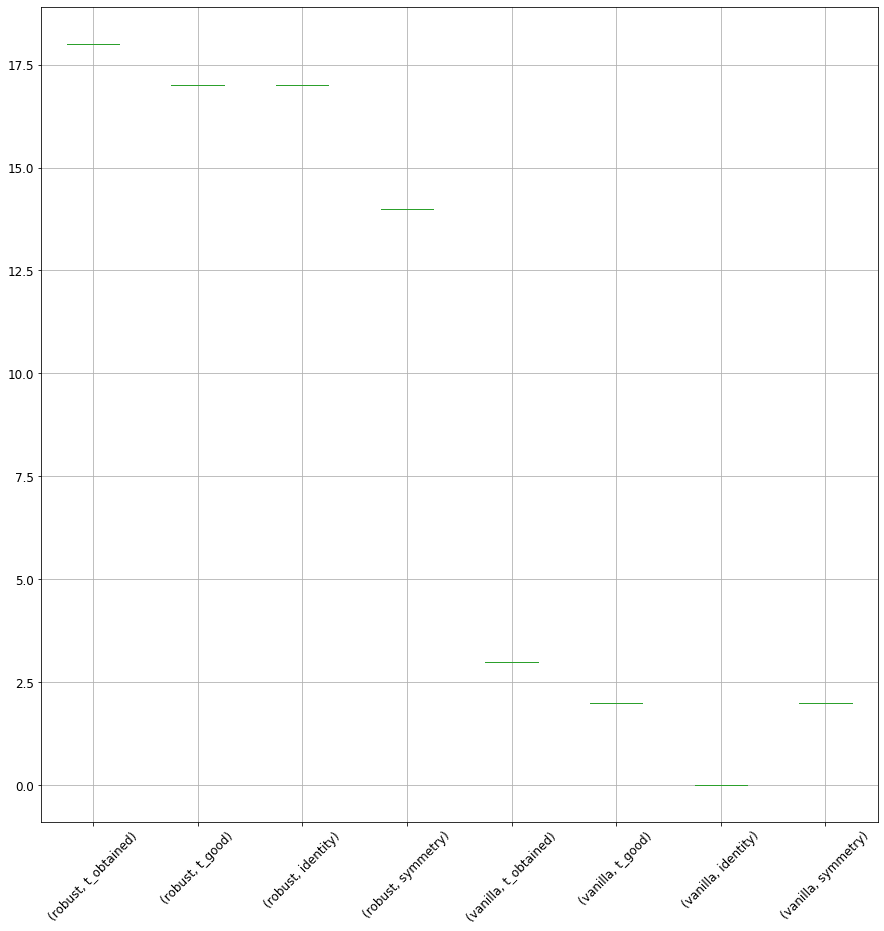

In [78]:
fn[['t_obtained', 't_good', 'identity', 'symmetry', 'model']].groupby('model').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

/Users/tommasoteofili/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


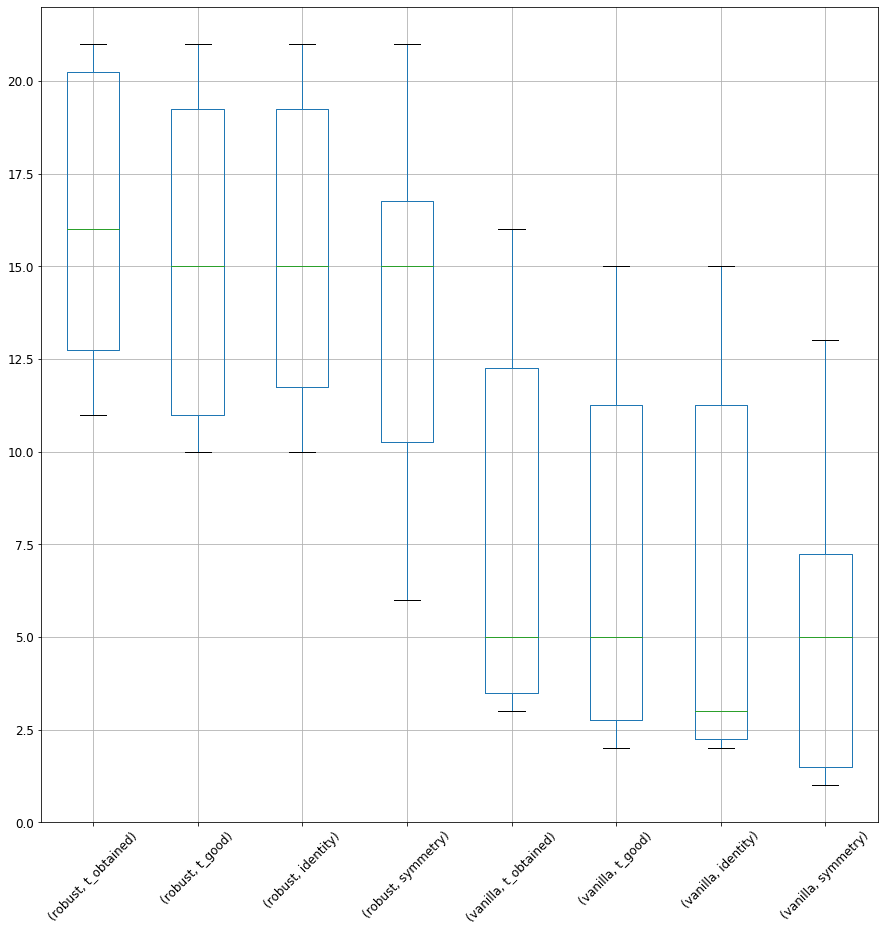

In [79]:
tn[['t_obtained', 't_good', 'identity', 'symmetry', 'model']].groupby('model').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

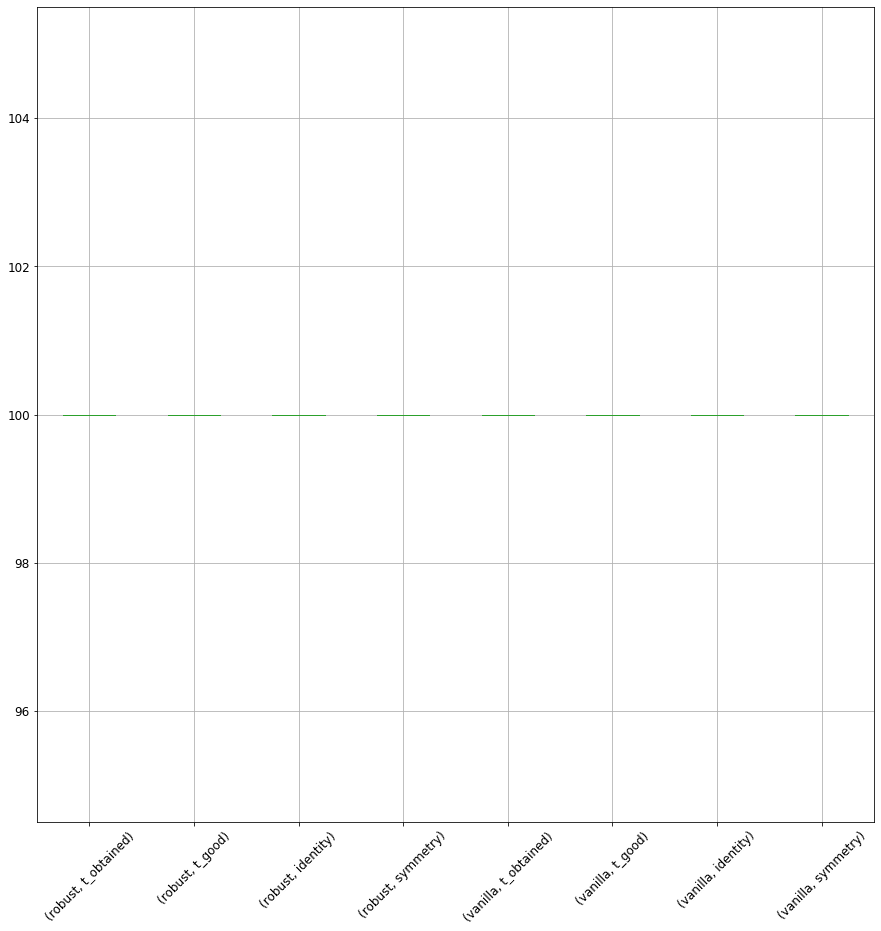

In [80]:
tp[['t_obtained', 't_good', 'identity', 'symmetry', 'model']].groupby('model').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))

/Users/tommasoteofili/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


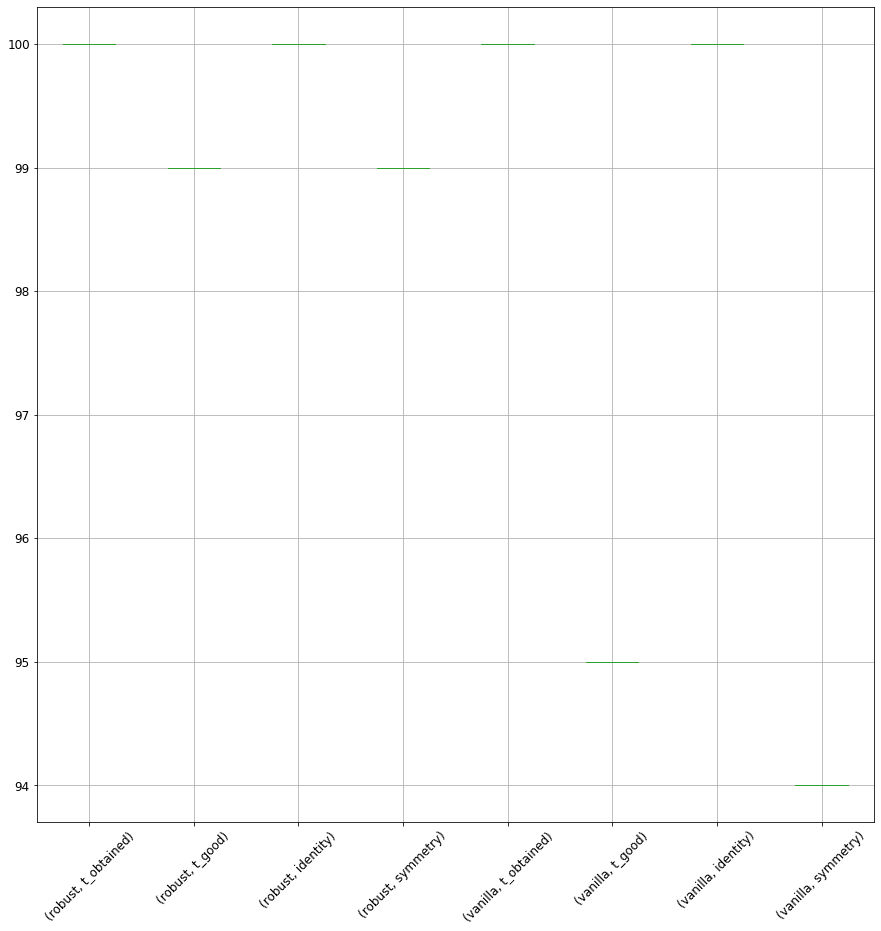

In [81]:
fp[['t_obtained', 't_good', 'identity', 'symmetry', 'model']].groupby('model').boxplot(subplots=False, rot=45, fontsize=12, figsize=(15,15))